# Detailed Data Analysis of IITG_MultimodalTextDataset

**Course:** DA323: Multimodal Data Analysis and Learning 2.0  
**Assignment:** Detailed Data Analysis of Text Data  
**Dataset Name:** IITG_MultimodalTextDataset  
**Description:**  
This notebook provides a comprehensive analysis of the text dataset collected from various websites across multiple categories. The analyses include:
- Exploratory Data Analysis (EDA)
- Word Frequency Analysis
- N-gram Analysis
- Word Cloud Visualization
- Sentiment Analysis using VADER
- Topic Modeling with LDA (via Gensim)


Let's begin by importing the required libraries and loading our dataset.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:

import os
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

# Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer

# Topic Modeling
import gensim
from gensim import corpora

# TF-IDF and Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Download required NLTK resources if not available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set plot style
plt.style.use('ggplot')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iitia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iitia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iitia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1. Data Loading

In this section, we load the cleaned text data files for each category from the `text_dataset/cleaned` folder. Each file contains preprocessed text data for one category.


In [6]:

# Define the folder path for cleaned data
cleaned_data_dir = os.path.join("IITG_MultimodalTextDataset", "cleaned")

# Get a list of all category files in the cleaned folder
category_files = [os.path.join(cleaned_data_dir, f) for f in os.listdir(cleaned_data_dir) if f.endswith(".txt")]

# Create a dictionary to store the content of each category
data_dict = {}

for file_path in category_files:
    category_name = os.path.basename(file_path).replace("_cleaned.txt", "").replace("_", " ")
    with open(file_path, "r", encoding="utf-8") as f:
        data_dict[category_name] = f.read()

# Display available categories
print("Categories loaded:")
for cat in data_dict:
    print(f"- {cat}")


Categories loaded:
- Art & Culture.txt
- Business.txt
- Education.txt
- Entertainment.txt
- Environment.txt
- Fashion.txt
- Finance.txt
- Food.txt
- Gaming.txt
- Health.txt
- History.txt
- Lifestyle.txt
- Literature.txt
- Music.txt
- Politics.txt
- Science.txt
- Sports.txt
- Technology.txt
- Travel.txt
- World News.txt


## 2. Exploratory Data Analysis (EDA)

In this section, we examine the overall structure of our text data.
We will:
- Calculate word counts for each category.
- Compute the most frequent words.


In [19]:

# Set up stop words (although data is already cleaned, this is to filter any residual common words)
stop_words = set(stopwords.words('english'))

def analyze_category_text(text):
    tokens = word_tokenize(text)
    word_count = len(tokens)
    # Count words excluding any remaining stop words
    freq_dist = Counter([token for token in tokens if token not in stop_words])
    return word_count, freq_dist

# Create a DataFrame for word counts
analysis_results = []

for category, text in data_dict.items():
    count, freq_dist = analyze_category_text(text)
    most_common = freq_dist.most_common(10)
    analysis_results.append({
        "Category": category,
        "Total_Words": count,
        "Top_Words": most_common
    })

df_analysis = pd.DataFrame(analysis_results)
df_analysis


Category  Total_Words  \
0   Art & Culture.txt          828   
1        Business.txt          456   
2       Education.txt           95   
3   Entertainment.txt          389   
4     Environment.txt           73   
5         Fashion.txt          261   
6         Finance.txt          385   
7            Food.txt          212   
8          Gaming.txt           44   
9          Health.txt          667   
10        History.txt           52   
11      Lifestyle.txt          124   
12     Literature.txt          126   
13          Music.txt          320   
14       Politics.txt          263   
15        Science.txt           87   
16         Sports.txt          648   
17     Technology.txt         1019   
18         Travel.txt          143   
19     World News.txt          429   

                                            Top_Words  
0   [(new, 16), (art, 15), (artists, 13), (museum,...  
1   [(best, 59), (credit, 34), (loans, 16), (cards...  
2   [(content, 33), (saved, 30), (education, 4), (...  
3   [(new, 6), (rolling, 4), (stone, 4), (title, 3...  
4   [(title, 3), (publication, 3), (date, 3), (unk...  
5   [(fashion, 6), (media, 5), (vogue, 4), (beauty...  
6   [(financial, 8), (us, 5), (content, 4), (title...  
7   [(yesterday, 5), (food, 4), (bon, 4), (appétit...  
8   [(title, 2), (publication, 2), (date, 2), (unk...  
9   [(written, 57), (studies, 20), (cited, 20), (h...  
10  [(history, 4), (content, 4), (title, 3), (publ...  
11  [(lifehacker, 4), (title, 3), (publication, 3)...  
12  [(one, 4), (title, 3), (hub, 3), (publication,...  
13  [(music, 5), (album, 5), (new, 5), (pitchfork,...  
14  [(news, 8), (mp, 5), (politics, 4), (title, 3)...  
15  [(science, 4), (title, 3), (news, 3), (publica...  
16  [(video, 10), (bbc, 6), (best, 6), (audio, 6),...  
17  [(ai, 10), (new, 8), (2025, 8), (game, 7), (te...  
18  [(condé, 9), (nast, 9), (travel, 7), (traveler...  
19  [(show, 11), (news, 8), (said, 7), (president,...

## 3. Word Cloud Visualization

A word cloud helps visualize the most frequent words. We'll generate a word cloud for each category.


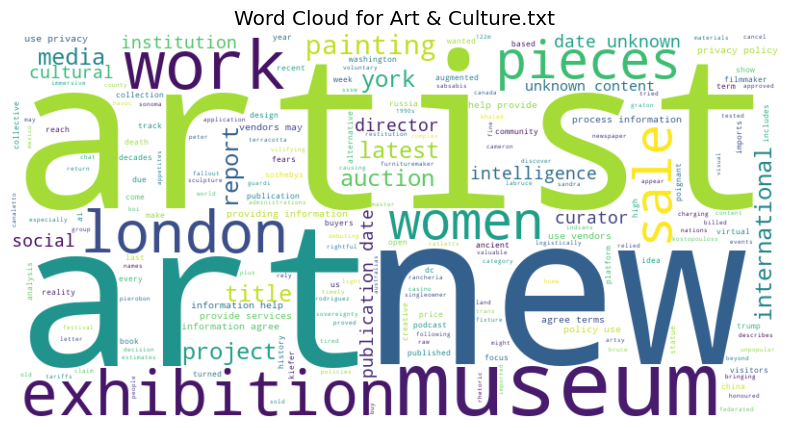

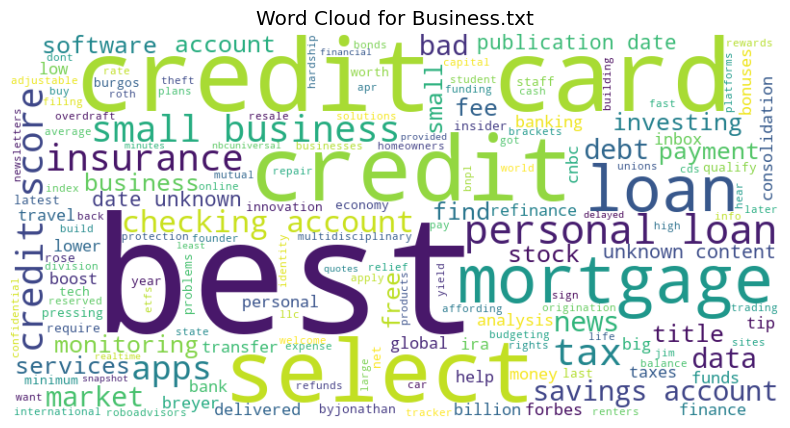

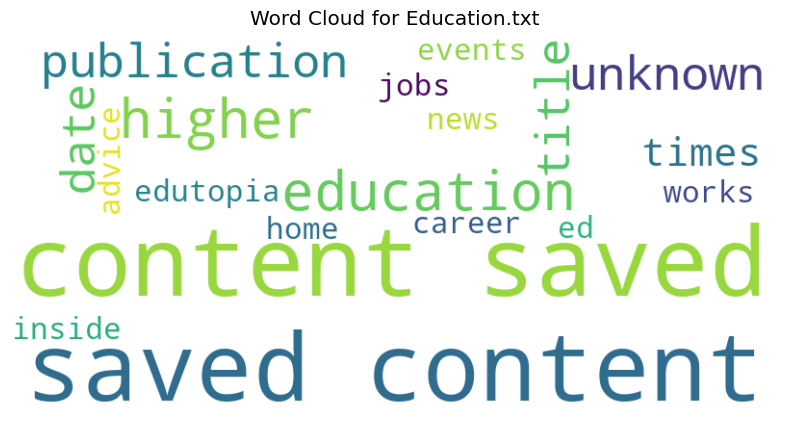

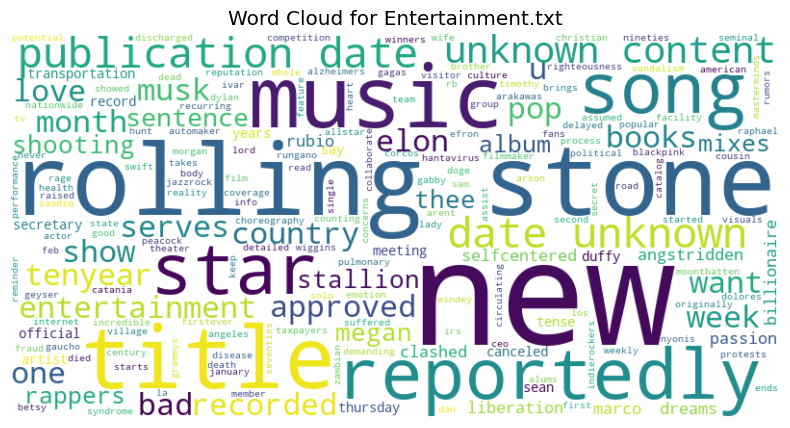

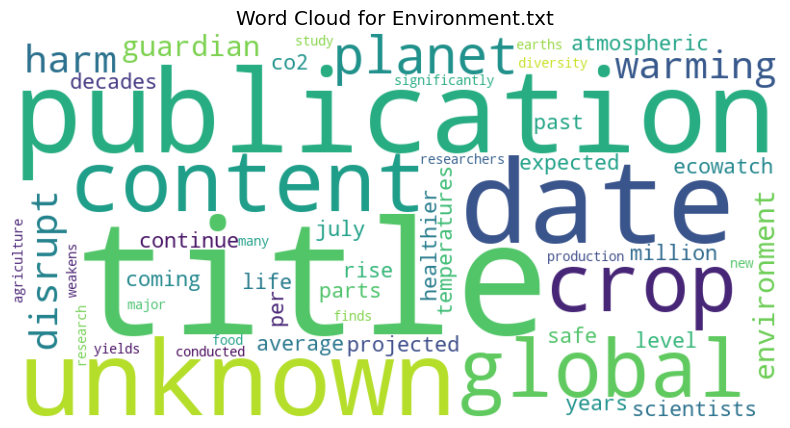

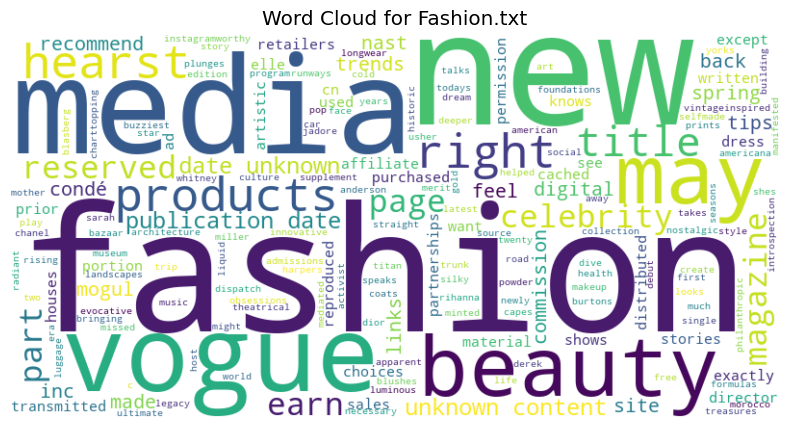

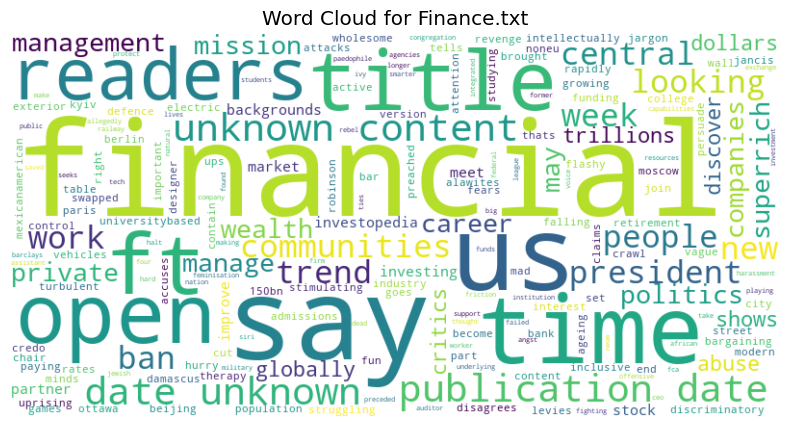

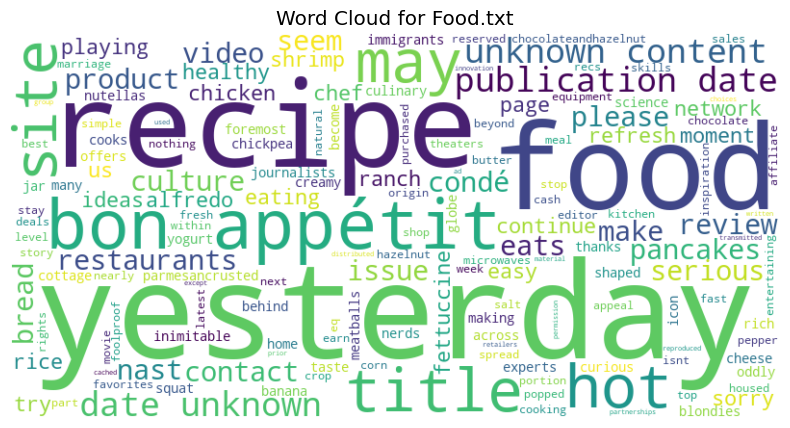

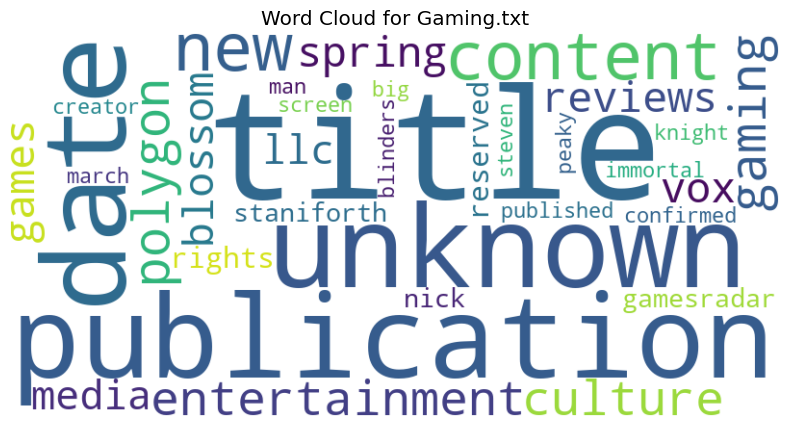

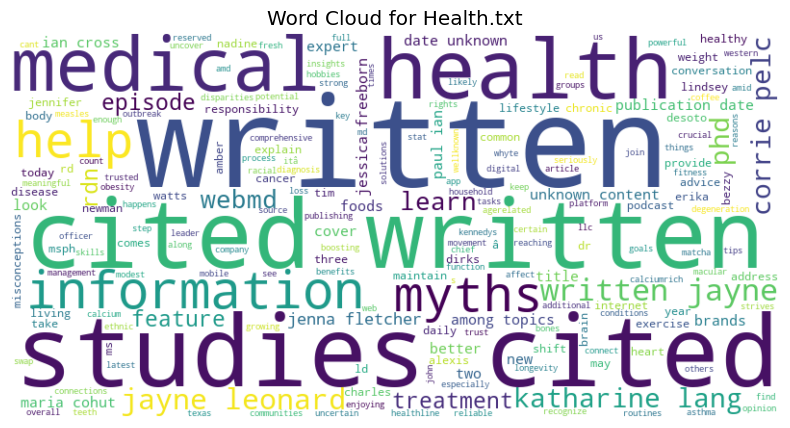

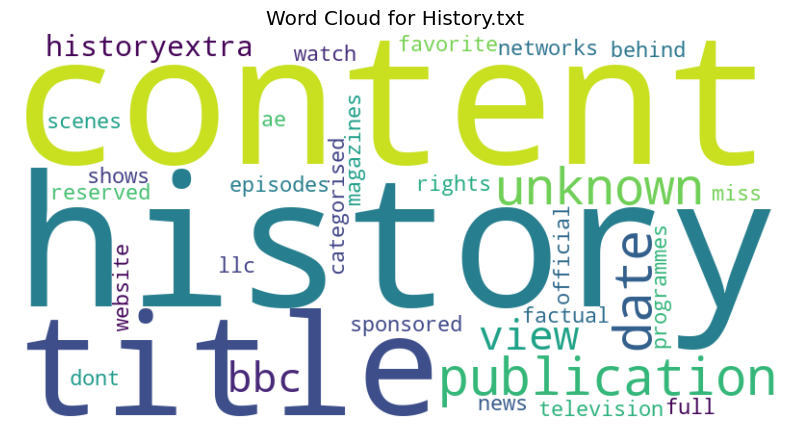

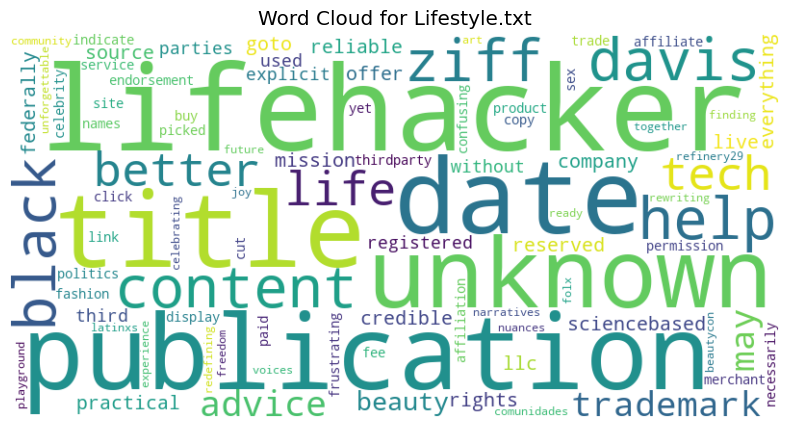

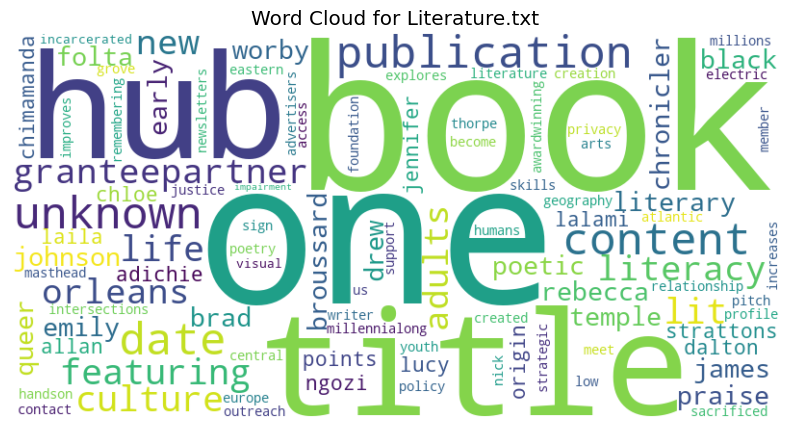

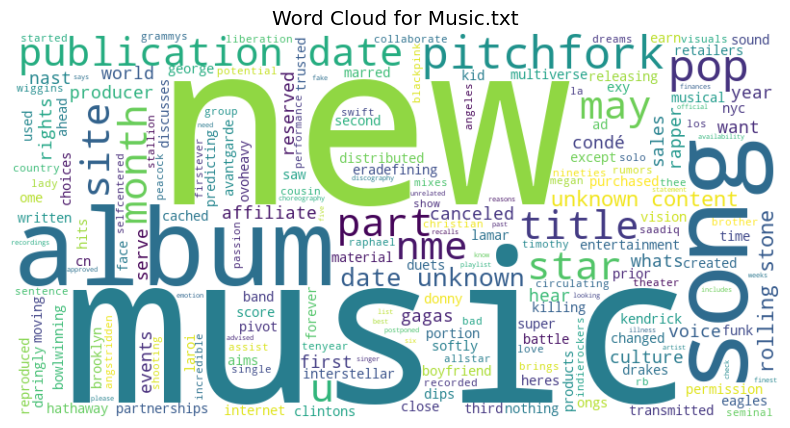

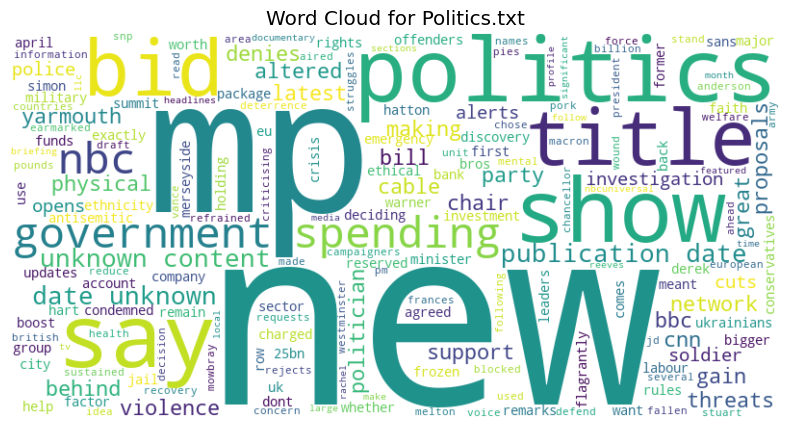

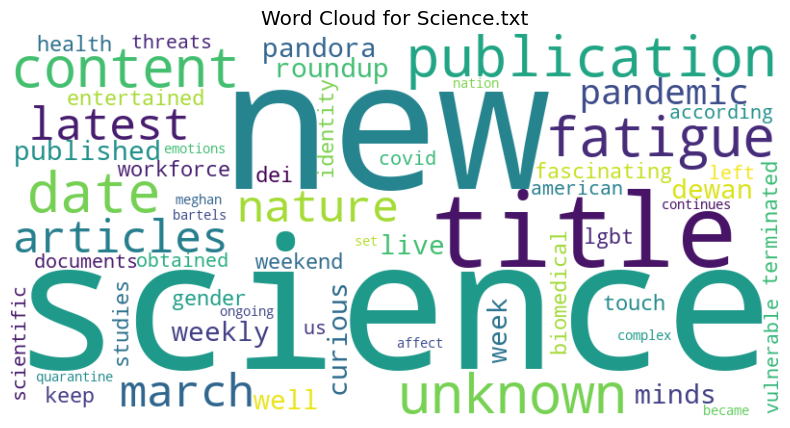

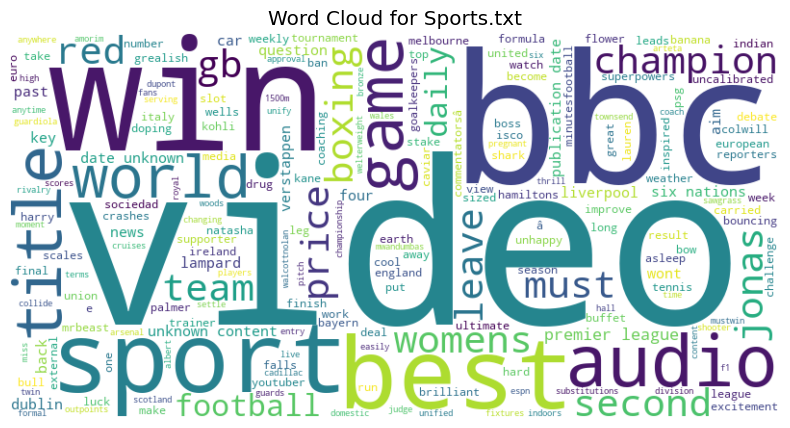

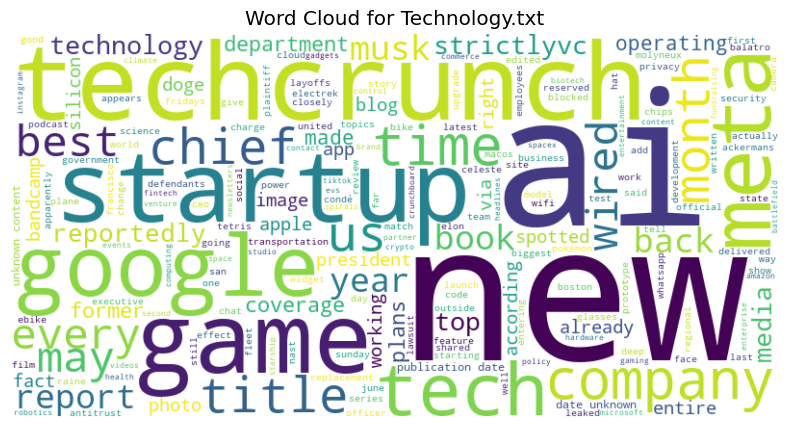

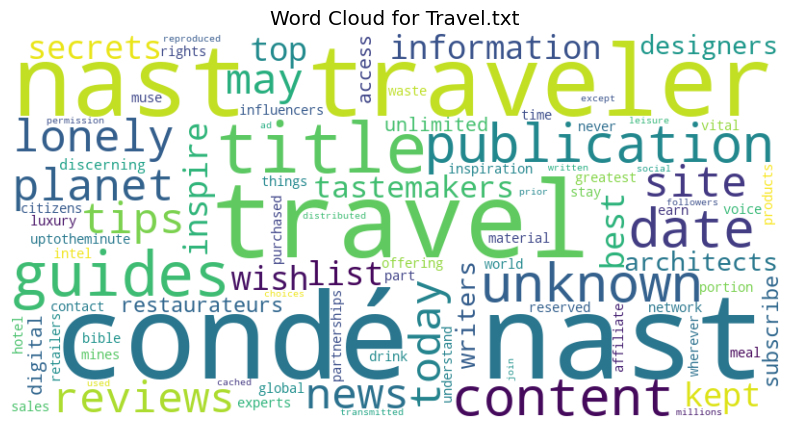

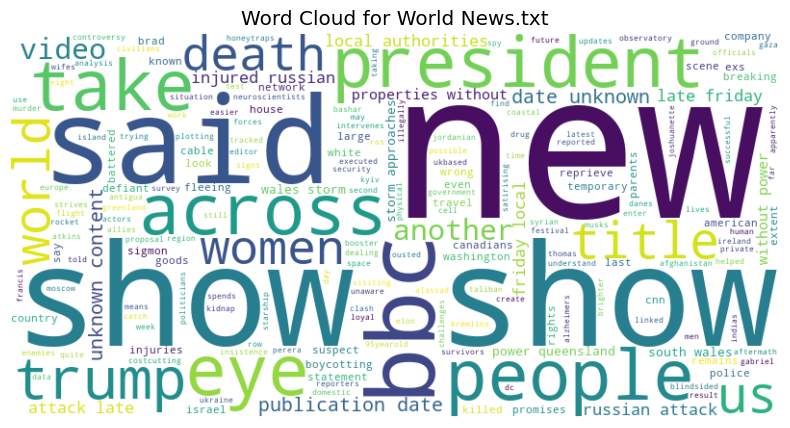

In [20]:

def plot_wordcloud(text, category):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {category}")
    plt.axis('off')
    plt.show()

# Generate word clouds for each category
for category, text in data_dict.items():
    plot_wordcloud(text, category)


## 4. N-gram Analysis

Here we extract bigrams and trigrams from the text data to understand common phrase patterns.


In [26]:

from nltk import ngrams

def get_ngrams(text, n):
    tokens = [token for token in word_tokenize(text) if token.isalpha()]
    return Counter(ngrams(tokens, n))

# Analyze bigrams and trigrams for a chosen category (e.g., Technology)
category_example = "Fashion.txt"
text_example = data_dict.get(category_example, "")


bigrams = get_ngrams(text_example, 2)
trigrams = get_ngrams(text_example, 3)

print(f"Top 10 bigrams in {category_example}:")
print(bigrams.most_common(10))

print(f"\nTop 10 trigrams in {category_example}:")
print(trigrams.most_common(10))


Top 10 bigrams in Fashion.txt:
[(('publication', 'date'), 3), (('date', 'unknown'), 3), (('unknown', 'content'), 3), (('rights', 'reserved'), 3), (('may', 'earn'), 3), (('fashion', 'beauty'), 2), (('condé', 'nast'), 2), (('beauty', 'tips'), 2), (('fashion', 'trends'), 2), (('part', 'hearst'), 2)]

Top 10 trigrams in Fashion.txt:
[(('publication', 'date', 'unknown'), 3), (('date', 'unknown', 'content'), 3), (('part', 'hearst', 'digital'), 2), (('hearst', 'digital', 'media'), 2), (('digital', 'media', 'may'), 2), (('media', 'may', 'earn'), 2), (('may', 'earn', 'commission'), 2), (('earn', 'commission', 'links'), 2), (('commission', 'links', 'page'), 2), (('links', 'page', 'recommend'), 2)]


## 5. Sentiment Analysis

We use NLTK's VADER sentiment analyzer to get an overall sentiment score for each category.


In [27]:

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sia.polarity_scores(text)

sentiment_results = []

for category, text in data_dict.items():
    sentiment = get_sentiment(text)
    sentiment_results.append({
        "Category": category,
        **sentiment
    })

df_sentiment = pd.DataFrame(sentiment_results)
df_sentiment


Category    neg    neu    pos  compound
0   Art & Culture.txt  0.053  0.815  0.132    0.9959
1        Business.txt  0.054  0.438  0.507    0.9999
2       Education.txt  0.000  0.436  0.564    0.9974
3   Entertainment.txt  0.123  0.721  0.155    0.9205
4     Environment.txt  0.114  0.811  0.075   -0.6369
5         Fashion.txt  0.014  0.831  0.155    0.9896
6         Finance.txt  0.171  0.684  0.145   -0.9544
7            Food.txt  0.016  0.786  0.198    0.9911
8          Gaming.txt  0.000  0.893  0.107    0.5859
9          Health.txt  0.026  0.839  0.134    0.9965
10        History.txt  0.000  0.917  0.083    0.5337
11      Lifestyle.txt  0.045  0.692  0.263    0.9870
12     Literature.txt  0.015  0.850  0.135    0.9393
13          Music.txt  0.079  0.785  0.136    0.9479
14       Politics.txt  0.150  0.705  0.145    0.1461
15        Science.txt  0.110  0.781  0.109    0.2263
16         Sports.txt  0.050  0.724  0.225    0.9992
17     Technology.txt  0.035  0.853  0.112    0.9974
18         Travel.txt  0.031  0.805  0.164    0.9671
19     World News.txt  0.169  0.755  0.077   -0.9935

## 6. Topic Modeling with LDA

We perform topic modeling using Latent Dirichlet Allocation (LDA) via Gensim.  
Steps:
- Tokenize the text and remove stop words.
- Create a dictionary and corpus.
- Fit an LDA model.


In [29]:

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

# For topic modeling, we'll combine data from a single category (or you can combine all categories).
# Here, we demonstrate with the "Technology" category.
tech_tokens = preprocess_text(data_dict.get("Technology.txt", ""))

# Create dictionary and corpus
dictionary = corpora.Dictionary([tech_tokens])
corpus = [dictionary.doc2bow(tech_tokens)]

# Train LDA model with 3 topics (adjust number of topics as needed)
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print topics
topics = lda_model.print_topics(num_words=5)
print("LDA Topics for Technology:")
for topic in topics:
    print(topic)


LDA Topics for Technology:
(0, '0.008*"ai" + 0.007*"new" + 0.006*"game" + 0.005*"techcrunch" + 0.004*"meta"')
(1, '0.001*"ai" + 0.001*"new" + 0.001*"game" + 0.001*"techcrunch" + 0.001*"get"')
(2, '0.001*"ai" + 0.001*"new" + 0.001*"game" + 0.001*"techcrunch" + 0.001*"tech"')


## 7: Text Classification Pipeline

In this step, we create a text classification model using our cleaned dataset. We:
- Construct a dataset by splitting the text for each category into paragraphs.
- Split the dataset into training and test sets.
- Vectorize text using TF-IDF.
- Encode labels and prepare one-hot encoded targets.
- Build and train a neural network classifier.
- Plot the training accuracy/loss curves.
- Evaluate the model with a confusion matrix and classification report.


In [62]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

In [63]:
# Create dataset from data_dict: split each category's text into paragraphs.
X = []
y = []
min_paragraph_length = 50  # Only include paragraphs longer than 50 characters

for category, text in data_dict.items():
    # Standardize category label: remove ".txt" (if present) and strip whitespace.
    cat = category.replace(".txt", "").strip()
    paragraphs = text.split('\n\n')
    for para in paragraphs:
        para = para.strip()
        if len(para) >= min_paragraph_length:
            X.append(para)
            y.append(cat)

print("Total samples:", len(X))
print("Label distribution:", Counter(y))

Total samples: 20
Label distribution: Counter({'Art & Culture': 1, 'Business': 1, 'Education': 1, 'Entertainment': 1, 'Environment': 1, 'Fashion': 1, 'Finance': 1, 'Food': 1, 'Gaming': 1, 'Health': 1, 'History': 1, 'Lifestyle': 1, 'Literature': 1, 'Music': 1, 'Politics': 1, 'Science': 1, 'Sports': 1, 'Technology': 1, 'Travel': 1, 'World News': 1})


### Train-Test Split and TF-IDF Vectorization

- We split the dataset into training and test sets. Then, we vectorize the text using TF-IDF.


In [64]:
# Since each category has only one sample, we cannot do a stratified split.
# For demonstration, we train and test on the entire dataset.
if len(X) < 50:
    print("Dataset is too small for train/test split. Using entire dataset for training and testing.")
    X_train, y_train, X_test, y_test = X, y, X, y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Dataset is too small for train/test split. Using entire dataset for training and testing.
Training samples: 20
Test samples: 20


In [65]:
# %% [code]
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Test TF-IDF shape:", X_test_tfidf.shape)

Train TF-IDF shape: (20, 2000)
Test TF-IDF shape: (20, 2000)


## Label Encoding

- We encode category labels into integers and then one-hot encode them for use in our neural network.


In [66]:
# %% [code]
# Label encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)

y_train_cat = to_categorical(y_train_enc, num_classes=num_classes)
y_test_cat = to_categorical(y_test_enc, num_classes=num_classes)

print("Encoded Categories:", le.classes_)

Encoded Categories: ['Art & Culture' 'Business' 'Education' 'Entertainment' 'Environment'
 'Fashion' 'Finance' 'Food' 'Gaming' 'Health' 'History' 'Lifestyle'
 'Literature' 'Music' 'Politics' 'Science' 'Sports' 'Technology' 'Travel'
 'World News']


### Building the Neural Network Model

- We use a simple feed-forward neural network with two hidden layers.  
- **Note:** The TF-IDF feature matrix is converted to dense arrays for training.


In [67]:
# Build a simple neural network model using Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_dim = X_train_tfidf.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\iitia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         256,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,684 (1.01 MB)

 Trainable params: 265,684 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

- We train the model for 10 epochs with a batch size of 16, using 10% of the training data for validation.


In [68]:
# Train the model
history = model.fit(
    X_train_tfidf.toarray(),
    y_train_cat,
    epochs=20,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.0000e+00 - loss: 3.0051 - val_accuracy: 0.0000e+00 - val_loss: 3.0158
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0579 - loss: 2.9777 - val_accuracy: 0.0000e+00 - val_loss: 3.0203
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 2.9824 - val_accuracy: 0.0000e+00 - val_loss: 3.0236
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1736 - loss: 2.9592 - val_accuracy: 0.0000e+00 - val_loss: 3.0275
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1157 - loss: 2.9468 - val_accuracy: 0.0000e+00 - val_loss: 3.0309
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1157 - loss: 2.9374 - val_accuracy: 0.0000e+00 - val_loss: 3.0358
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2315 - loss: 2.9002 - val_accuracy: 0.0000e+00 - val_loss: 3.0420
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2894 - loss: 2.8961 - val

### Plotting Accuracy and Loss Curves

- Below we plot the training and validation accuracy and loss over the epochs.


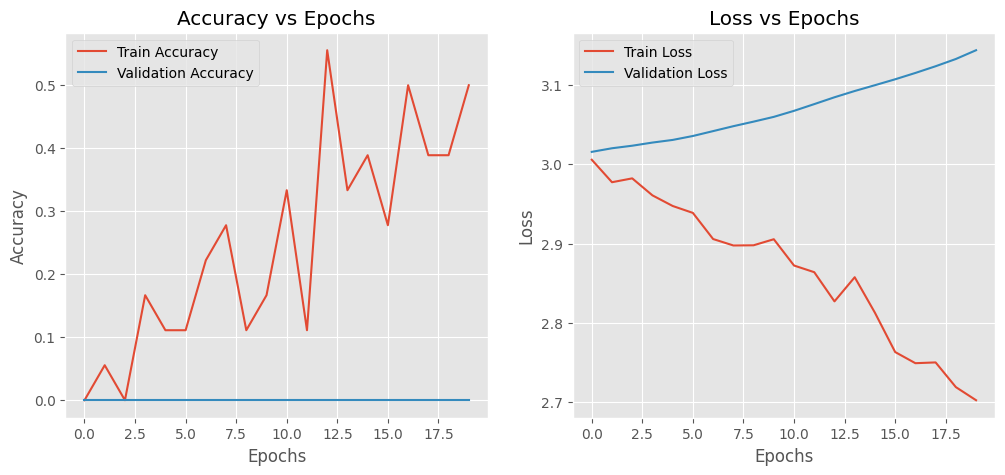

In [69]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.show()


### Evaluating the Model

- We predict on the test set, compute the confusion matrix, and display the classification report.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


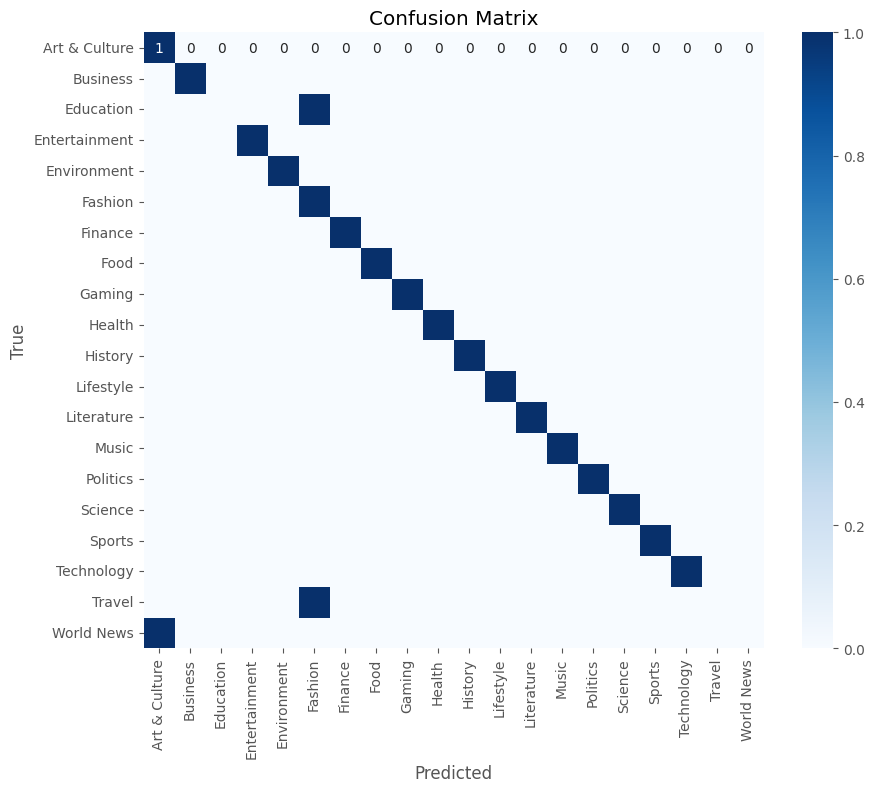

Classification Report:
                precision    recall  f1-score   support

Art & Culture       0.50      1.00      0.67         1
     Business       1.00      1.00      1.00         1
    Education       0.00      0.00      0.00         1
Entertainment       1.00      1.00      1.00         1
  Environment       1.00      1.00      1.00         1
      Fashion       0.33      1.00      0.50         1
      Finance       1.00      1.00      1.00         1
         Food       1.00      1.00      1.00         1
       Gaming       1.00      1.00      1.00         1
       Health       1.00      1.00      1.00         1
      History       1.00      1.00      1.00         1
    Lifestyle       1.00      1.00      1.00         1
   Literature       1.00      1.00      1.00         1
        Music       1.00      1.00      1.00         1
     Politics       1.00      1.00      1.00         1
      Science       1.00      1.00      1.00         1
       Sports       1.00      1.00      

C:\Users\iitia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iitia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# %% [code]
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred_prob = model.predict(X_test_tfidf.toarray())
y_pred = y_pred_prob.argmax(axis=1)

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))


## 8. Conclusion

In this notebook we have:
- Loaded and inspected the cleaned text dataset.
- Performed exploratory analysis with word frequency counts and visualized the data using word clouds.
- Extracted n-grams (bigrams and trigrams) to understand common phrases.
- Conducted sentiment analysis for each category.
- Applied topic modeling with LDA to extract underlying topics (demonstrated on Technology data).
- Vectorized text using TF-IDF and clustered the documents using KMeans.

This multi-faceted analysis provides a detailed understanding of the dataset, and you can expand these methods further based on your project needs.

---
